# SparkBenchmark

In [1]:
import matplotlib.pyplot
import time
import matplotlib.pyplot as plt
import numpy as np
import lfunction


# Parametros

### Coloque os nomes das aplicações que servirão de labels para o gráfico

In [2]:

A = 'HD'
B = 'Gluster'
C = 'SSD'


### Coloque os caminhos desejados dos Datasets

In [3]:
caminhoA = '/home/tiago/Projeto_Final_Database/Life_Expectancy_Data.csv' # HD
#caminhoA = '/home/tiago/Projeto_Final_Database/Life_Expectancy_Data.csv' # HD


caminhoB = '/data/Projeto_Final_Database/Life_Expectancy_Data.csv' # Gluster
#caminhoB = '/data/Projeto_Final_Database/Life_Expectancy_Data.csv' # Gluster


caminhoC = '/tmp/Projeto_Final_Database/Life_Expectancy_Data.csv' # SSD
#caminhoC = '/tmp/Projeto_Final_Database/Life_Expectancy_Data.csv' # SSD


### Logo abaixo você poderá editar título do gráfico e as labels correspondentes de RUN/LOOP (Esses valores não afetam nos testes)


In [4]:
cod = 'LifeExp'
run = '30r'
loop = '2l'

title = 'Desempenho do código ' + cod + ' | ' + run + ' x ' + loop

figName = cod + '_' + run + '_' + loop + '.png'


# Execução

### Abaixo você deve colocar o caminho do código em Python Notebook que deverá ser testado

In [5]:
%%capture

def firstCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")

def secondCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")
    
def thirdCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")

# Testes

### Os valores numericos abaixo correspondem respectivamente, LOOP e RUN (Esses valores afetam no resultado dos testes)

### RUN = Corresponde ao número de vezes que o seu código será executado, a média de tempo é tirada através do número total de RUNS.

### LOOP = Corresponde ao número de vezes que seu código será executado, o desvio padrão é tirado do número total de loops. A cada série de loops será considerado o melhor valor. Ajuste o número de loops de acordo com a necessidade precisão do resultado.

### O número do total de vezes que seu código será executado é definido por LOOP x RUN, tenha isso em mente quando for alterar os valores.

### Atenção: Por padrão o número de runs é definido por 30 conforme abordado no teste amostral do Raj Jain, no entanto você é livre para alterar esse valor

In [6]:
%%capture
path = caminhoA
%store path
a = %timeit -n 2 -r 30 -o firstCode()

In [7]:
%%capture
path = caminhoB
%store path
b = %timeit -n 2 -r 30 -o secondCode()

In [8]:
%%capture
path = caminhoC
%store path
c = %timeit -n 2 -r 30 -o thirdCode()

# Resultados

### O primeiro valor mostrado trata-se da Média Aritmética do Número de Runs

### O segundo valor mostrado trata-se do Desvio padrão

In [9]:
print("")

print("- Tempo de execução " + A + ":")
print(a)

print("")

print("- Tempo de execução " + B + ":")
print(b)

print("")

print("- Tempo de execução " + C + ":")
print(c)



- Tempo de execução HD:
5.56 s ± 1.21 s per loop (mean ± std. dev. of 30 runs, 2 loops each)

- Tempo de execução Gluster:
5.14 s ± 148 ms per loop (mean ± std. dev. of 30 runs, 2 loops each)

- Tempo de execução SSD:
5.13 s ± 189 ms per loop (mean ± std. dev. of 30 runs, 2 loops each)


# Gráfico

### Ao final é apresentado um gráfico em barras verticais, e salvo em um arquivo PNG

### Atenção: Por padrão, todos os valores de tempo são convertidos para segundos

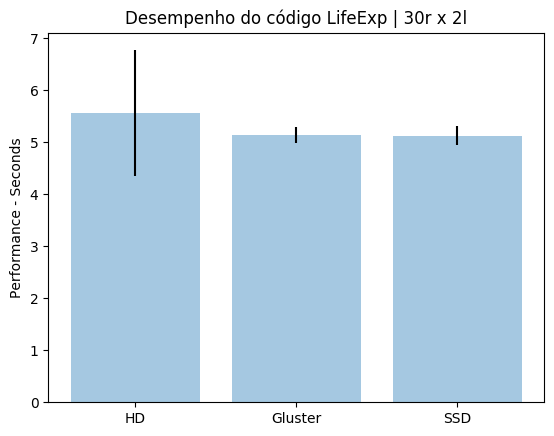

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots()



# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média de tempo de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime = lfunction.convert(float(a.split(' ')[0]), a.split(' ')[1])
bTime = lfunction.convert(float(b.split(' ')[0]), b.split(' ')[1])
cTime = lfunction.convert(float(c.split(' ')[0]), c.split(' ')[1])

# Separando o desvio padrão de cada componente testado e Convertendo tudo para Segundos caso não esteja

aDev = lfunction.convert(float(a.split(' ')[3]), a.split(' ')[4])
bDev = lfunction.convert(float(b.split(' ')[3]), b.split(' ')[4])
cDev = lfunction.convert(float(c.split(' ')[3]), c.split(' ')[4])

# Atribuindo todos os dados ao gráfico

people = (A, B, C)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

x_pos = np.arange(len(people))
performance = results

error = dev

plt.bar(x_pos, performance, yerr=error, align='center', alpha=0.4)
plt.xticks(x_pos, people)
plt.ylabel('Performance - Seconds')
plt.title(title)


plt.savefig(figName)
plt.show()